In [35]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import RobotManyDofs
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, cart_to_joint_dynamic
from ppr.sampling import get_shortest_path

In [53]:
# FIRST EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=1.5)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)

# PATH circle with centre segment c and radius R, N path points
c = [6, 2]; R = 1.2; N = 10;
t = np.linspace(np.pi, 3 * np.pi/2, N)
x = R * np.cos(t) + c[0]
y = R * np.sin(t) + c[1]
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

sc1 = []
sc1.append(Rectangle(3, 0, 0.2, 2, 0))
sc1.append(Rectangle(4, 0, 2, 0.2, 0))

In [42]:
# SECOND EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=2)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)

# PATH line in gap
N = 5
G = 0.5
x = G / 2 * np.ones(N)
y = np.linspace(4, 6, N)
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

# collision scene small gap width G

sc1 = []
sc1.append(Rectangle(-2, 4, 2, 4, 0))
sc1.append(Rectangle( G, 4, 2, 4, 0))

In [36]:
# Third EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=2)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)

# PATH circle with centre c and radius R, N path points
c = [7, 7]; R = 0.5; N = 10;
t = np.linspace(0, 2*np.pi, N)
x = R * np.cos(t) + c[0]
y = R * np.sin(t) + c[1]
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

# COLLISION SCENE squares with side S
S = 1.2
sc1 = []
sc1.append(Rectangle(1.5, 3.5, S, S, 0))
sc1.append(Rectangle(3.5, 1.5, S, S, 0)) 
sc1.append(Rectangle(3.5, 3.5, S, S, 0))
sc1.append(Rectangle(3.5, 5.5, S, S, 0))
sc1.append(Rectangle(5.5, 3.5, S, S, 0))

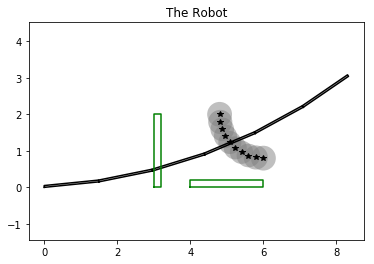

In [54]:
q_random = [0.1] * 8

fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, q_random, 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
plt.show()

In [55]:
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
settings = {'max_iters': 20, 'min_js': 100, 'js_inc': 10, 'red_js_inc': 100,
            'ik_sampling_method': 'halton'}
path_js = cart_to_joint_dynamic(robot1, path1, check_collision = True, scene=sc1,
                                parameters=settings)

Processing trajectory point[ 4.8  2.   0. ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 215 joint solutions
After 0 iterations
Processing trajectory point[ 4.8182307   1.79162219  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 198 joint solutions
After 0 iterations
Processing trajectory point[ 4.87236886  1.58957583  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 180 joint solutions
After 0 iterations
Processing trajectory point[ 4.96076952  1.4         0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 150 joint solutions
After 0 iterations
Processing trajectory point[ 5.08074667  1.22865487  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 137 joint solutions
After

In [56]:
print([len(qp) for qp in path_js])

[215, 198, 180, 150, 137, 117, 107, 205, 196, 186]


In [57]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
True


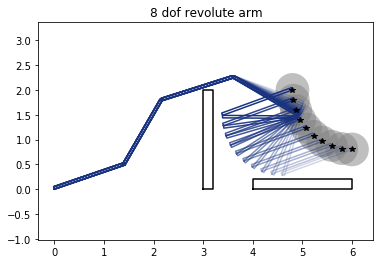

In [58]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
    
plt.title("8 dof revolute arm")
plt.show()

In [14]:
from ppr.graph_pure_python import get_shortest_path, get_shortest_path_segments

In [24]:
sol2 = get_shortest_path_segments(path_js, 8)
print(sol2)

{'success': True, 'path': [array([ 0.91144973, -0.16336282,  0.48085603, -0.98542166, -0.39192027,
        1.60930419], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.92387962, -0.35581523,
        1.56337059], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.95010918, -0.21589302,
        1.60481834], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.89156121, -0.33304825,
        1.81856596], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -1.0429728 , -0.11629024,
        1.90835989], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -1.05287123, -0.2678504 ,
        2.0698185 ], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.56963724,  0.3600274 ,
        0.95585233], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.51095361,  0.35318205,
        0.94381106], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.60162038,  0.18154772,
        0.86963832], dtype=fl

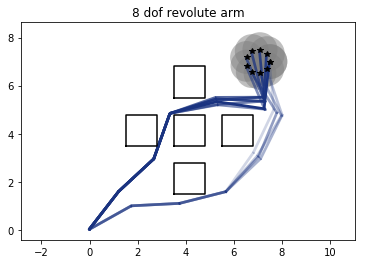

In [25]:

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol2['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
    
plt.title("8 dof revolute arm")
plt.show()

In [32]:
from ppr.sampling import iterative_bfs

In [33]:
sol3 = iterative_bfs(robot1, path1, sc1, tol=0.1, red=3, max_iter=5)

converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q


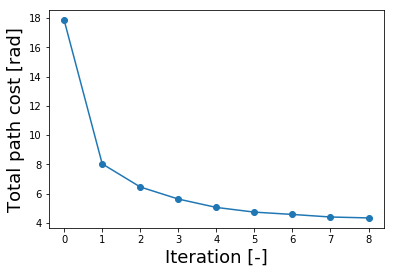

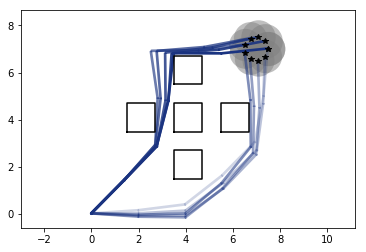

In [34]:
plt.plot(sol['length_all_iterations'], 'o-')
plt.xlabel("Iteration [-]", fontsize=18)
plt.ylabel("Total path cost [rad]", fontsize=18)
plt.show()

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
plt.show()